# Introduction to Adversarial Attacks

# 1. Loading a CNN
To save time, we will use a pretrained CNN (on the CIFAR-10 dataset) in order to test various adversarial attacks. It has a straight-forward architecture, which is shown below. We have already trained the model for you and saved the weights in `CNN_weights.pth`. In order to load the weights, you will have to fill in the architecture below.

### Task 1
Complete the forward method using the provided class. 


<details>
<summary>🔐 <b>Solution for Task #1</b></summary>

```python

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.pooling = MaxPool2d(2,2)
        self.dropout = Dropout(p=0.3)
        self.conv2 = Conv2d(16, 32, kernel_size = 3, padding = 1)
        self.relu = ReLU()
        self.flatten = Flatten()
        self.linear1 = Linear(2048, 128)
        self.linear2 = Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x) #Convolution layer
        x = self.pooling(x) #Max Pooling Layer
        x = self.dropout(x) #Dropout Layer
        x = self.conv2(x) #Second Convolution Layer
        x = self.pooling(x) #Second Pooling Layer
        x = self.flatten(x) #Flatten Layer
        x = self.relu(self.linear1(x)) #Regular Layer
        x = self.dropout(x) #Second Dropout Layer
        x = self.linear2(x) #Output Layer
        return x
```

</details>

In [1]:
import torch
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, ReLU, Dropout #All of the necessary layers for this model

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = Conv2d(3, 16, kernel_size = 3, padding = 1)
        self.pooling = MaxPool2d(2,2)
        self.dropout = Dropout(p=0.3)
        self.conv2 = Conv2d(16, 32, kernel_size = 3, padding = 1)
        self.relu = ReLU()
        self.flatten = Flatten()
        self.linear1 = Linear(2048, 128)
        self.linear2 = Linear(128, 10)

    def forward(self, x):

        ######### YOUR CODE STARTS HERE ######### 
        # 1. conv1
        # 2. pooling
        # 3. dropout
        # 4. conv2
        # 5. pooling
        # 6. flatten
        # 7. linear1
        # 8. relu
        # 9. dropout
        # 10. linear2
        ######### YOUR CODE STARTS HERE ######### 

        out = self.conv1(x)        # 1. conv1
        out = self.pooling(out)    # 2. pooling
        out = self.dropout(out)    # 3. dropout
        out = self.conv2(out)      # 4. conv2
        out = self.pooling(out)    # 5. pooling
        out = self.flatten(out)    # 6. flatten
        out = self.linear1(out)    # 7. linear1
        out = self.relu(out)       # 8. relu
        out = self.dropout(out)    # 9. dropout
        out = self.linear2(out)    # 10. linear2
        
        return out

In [2]:
model = CNN()
model.load_state_dict(torch.load('CNN_weights.pth'))
model.eval() #Puts the model on 'eval mode', stopping Dropout operations

ERROR! Session/line number was not unique in database. History logging moved to new session 30


CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=2048, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=10, bias=True)
)

# 2. Loading and Processing Images

Images must be converted into pytorch tensors of a specific size for prediction.

### Task 2
Write a function that converts 'frog.jpg' into a transformed pytorch tensor and resizes it to (32,32)


<details>
<summary>💡 <b>Hint for Task #2</b></summary>

In our solution we use 
```python 
Compose([Transform1, Transform2])
```

</details>


<details>
<summary>🔐 <b>Solution for Task #2</b></summary>

```python

def process_image(path):
    """
    Convert file path to scaled torch tensor
    
    Parameters:
    -----------
    path : str
        Filepath for image

    Returns:
    --------
    processedImg: Scaled and transformed image tensor
    
    """
    img = Image.open(path)
    transform = Compose([Resize((32,32)), ToTensor()])
    processedImg = transform(img)
    processedImg = processedImg.unsqueeze(0)
    return processedImg
```

</details>

In [3]:
from torchvision.io import read_image
from torchvision.transforms import Compose, Resize, ToTensor
from PIL import Image

def process_image(path):
    """
    Convert file path to scaled torch tensor
    
    Parameters:
    -----------
    path : str
        Filepath for image

    Returns:
    --------
    processedImg: Scaled and transformed image tensor
    
    """
    img = Image.open(path)

    ######### YOUR CODE HERE #########
    #Write a PyTorch image composition to resize and convert to a tensor
    transform = Compose([
        Resize((32, 32)),
        ToTensor()
    ]);
    ###
    processedImg = transform(img)
    processedImg = processedImg.unsqueeze(0)
    return processedImg

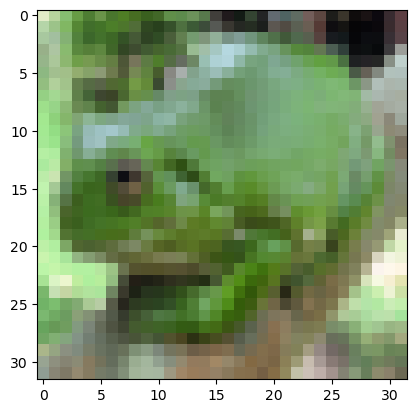

In [4]:
import matplotlib.pyplot as plt

def show_image(img):
    """
    Display image tensor using plt
    
    Parameters:
    -----------
    img : Tensor
        image Tensor to be displayed
    """
    img = img.squeeze(0)
    plt.imshow(img.permute(1, 2, 0).detach().numpy()) #Reorder columns as PIL and Torch order image data differently

show_image(process_image('frog.jpg'))

## 2a. Making Predictions

### Task 2a
Using the function you created above, predict what the model classifies the frog to be.

If prediction leads to an error, the CNN was likely constructed incorrectly.


</details>

<details>
<summary>🔐 <b>Solution for Task #2a</b></summary>

```python

print(prediction(process_image('frog.jpg')))
```

</details>


In [5]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def prediction(img):
    """
    Return prediction tuple:
    
    Parameters:
    -----------
    model : PyTorch model used for classification
    img : Tensor
        image Tensor to be predicted

    Returns:
    --------
    pred_class : torch.Tensor
        The predicted class label
    prob : torch.Tensor
        The confidence of the model 
    
    """
    with torch.no_grad(): #Stops calculating gradients
        prediction = model(img)
        _, pred_class = torch.max(prediction, 1)
    probs = prediction.softmax(dim=-1) #Softmax function used to calculate probabilities
    return pred_class, probs[0][pred_class]

###TODO
#Use the above functions to predict 'frog.jpg'
prediction(process_image('frog.jpg'))

(tensor([6]), tensor([0.2549]))

# 3. Making an adversarial image using FGSM
$ x' = x + \epsilon \cdot sign(\nabla loss_{F,t}(x))
$

### Task 3

Using the above formula, complete the code for FGSM (Fast Gradient Sign Method). Work out the loss produced by the generated output with regard to the correct output (using loss_fn), and then calculate the gradient of this loss, relative to the input data. Then find the signs of the gradient, and adjust x accordingly.

The loss function, CrossEntropyLoss, has been loaded for you at the top of the cell below.

<details>
<summary>💡 <b>Hint for Task #3</b></summary>

The following python example demonstrates how to find the gradient of the loss function with respect to the pixels in the image:
```python

img.requires_grad = True
out = model(img)
loss = loss_fn(out, y)
loss.backward()
grad = img.grad.data

```

</details>


<details>

<summary>🔐 <b>Solution for Task #3</b></summary>

```python

def FGSM_generator(model, loss_fn, path, y, epsilon=8/255):
    """
    Create adversarial image with FGSM:
    
    Parameters:
    -----------
    model : PyTorch model used for classification
    loss_fn : Loss function
    path: Image filepath
    y: Image label
    epsilon: Perturbation variable

    Returns:
    --------
    adv_img: Adversarially perturbed image tensor
    """
    
    # 1. Calculate the loss (wrt. output and y)
    img = process_image('frog.jpg')
    img.requires_grad = True
    out = model(img)
    loss = loss_fn(out, y)

    # 2. Calculate the gradient with respect to input data
    loss.backward()
    grad = img.grad.data

    # 3. Perturb the image using the signs of the gradient
    x_dash = img + epsilon * torch.sign(grad)
    x_dash = torch.clamp(x_dash, 0, 1)
    
    return x_dash
        
```

</details>

In [6]:
loss_fn = torch.nn.CrossEntropyLoss()

def FGSM_generator(model, loss_fn, path, y, epsilon=8/255):
    """
    Create adversarial image with FGSM:
    
    Parameters:
    -----------
    model : PyTorch model used for classification
    loss_fn : Loss function
    path: Image filepath
    y: Image label
    epsilon: Perturbation variable

    Returns:
    --------
    adv_img: Adversarially perturbed image tensor
    """

    ######### YOUR CODE STARTS HERE ######### 
    # 1. Calculate the loss (wrt. the pixels of the image)
    # 2. Calculate the gradient with respect to input data
    # 3. Perturb the image using the signs of the gradient
    ######### YOUR CODE STARTS HERE ######### 

    
    # 1. Calculate the loss (wrt. output and y)
    img = process_image('frog.jpg')
    img.requires_grad = True
    out = model(img)
    loss = loss_fn(out, y)

    # 2. Calculate the gradient with respect to input data
    loss.backward()
    grad = img.grad.data

    img.requires_grad_(False) # no longer need to track gradient

    # 3. Perturb the image using the signs of the gradient
    img_adv = img + epsilon * torch.sign(grad)
    img_adv = torch.clamp(img_adv, 0, 1)
    
    return img_adv

path = 'frog.jpg'
x_adv_FGSM = FGSM_generator(model, loss_fn, path, prediction(process_image(path))[0])
pred = prediction(x_adv_FGSM)
print(f"Prediction: {classes[pred[0]]} with probability {pred[1][0]:.2f}")

Prediction: deer with probability 0.28


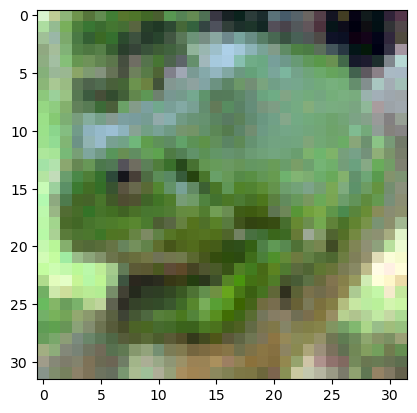

In [7]:
show_image(x_adv_FGSM)

# 4. Making an adversarial image using IGSM 


### Task 4

Now that you have completed the FGSM function, completing IGSM should be mostly the same. The one potentially challenging part is making sure that you are clipping the image in the correct way. That's why first we ask you complete the helper function for clipping before moving on to the full IGSM function. 

All this operation has to do is force x to be between x - ε and x + ε and between 0 and 1. You can use the [torch.clamp](https://docs.pytorch.org/docs/stable/generated/torch.clamp.html) function for this.

<details>
<summary>🔐 <b>Solution for Task #4</b></summary>

```python

def clip(x, epsilon):
    """
    Return clipped x
    
    Parameters:
    -----------
    x: Input image tensor
    epsilon: Perturbation variable
    
    Returns:
    --------
    x_clipped: Clipped version of image tensor x
    """
    x = torch.clamp(x, x - epsilon, x + epsilon)
    x = torch.clamp(x, 0, 1)
    return x
```

</details>

In [8]:
from torch import clamp

def clip(x, x_original, epsilon):
    """
    Return clipped x
    
    Parameters:
    -----------
    x: Input image tensor
    epsilon: Perturbation variable
    
    Returns:
    --------
    x_clipped: Clipped version of image tensor x
    """
    
    ######### YOUR CODE STARTS HERE ######### 
    # 1. Clip x epsilon distance away
    # 2. Clip x between 0 and 1
    ######### YOUR CODE STARTS HERE #########

    diff = x - x_original
    
    # 1. Clip x epsilon distance away
    diff = torch.clamp(diff, -epsilon, epsilon)
    x_cliped = x_original + diff

    # 2. Clip x between 0 and 1
    x_final = torch.clamp(x_cliped, 0, 1)

    return x_final

### Task 4a

$ x'_i = x'_{i-1} + clip_\epsilon(\alpha \cdot sign(\nabla loss_{F,t}(x'_{i-1})))
$

Using the above formula, complete the code for IGSM (Iterative Gradient Sign Method). You will not have to change much from your existing code for FGSM.

<details>
<summary>💡 <b>Hint for Task #4a</b></summary>


The PyTorch operations that you will need to use to do clipping and to update the image you are optimizing will throw errors for a tensor that requires grad. For example, you may see an error that looks something like this:

```
RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.
```

One way to work around this is to 'detach' the img tensor from the pytorch computational graph. In other words, this will remove gradient-tracking requirements and set `img.grad` to `None`.

```python
img = img.detach()
```


</details>



<details>
<summary>🔐 <b>Solution for Task #4a</b></summary>

```python

def IGSM_generator(path, y, epsilon=1/1000, alpha=0.0005, num_iters=6):
    """
    Create adversarial image with IGSM:
    
    Parameters:
    -----------
    model : PyTorch model used for classification
    loss_fn : Loss function
    path: Image filepath
    y: Image label
    epsilon: Perturbation variable
    Alpha: Perturbation variable
    num_iters: Number of iterations

    Returns:
    --------
    adv_img: Adversarially perturbed image tensor
    """
    x = process_image(path)
    x.requires_grad = True
    for i in range(num_iters):
        x.requires_grad = True
        output = model(x)
        loss = loss_fn(output, y)
        model.zero_grad()
        loss.backward()
        loss_gradient = x.grad.data
        x = x.detach()
        x = x + alpha * torch.sign(loss_gradient)
        x = clip(x, epsilon)    
    return x
```

</details>

In [9]:
def IGSM_generator(model, loss_fn, path, y, epsilon=8/255, alpha=0.01, num_iters=6):
    """
    Create adversarial image with IGSM:
    
    Parameters:
    -----------
    model : PyTorch model used for classification
    loss_fn : Loss function
    path: Image filepath
    y: Image label
    epsilon: Perturbation variable
    Alpha: Perturbation variable
    num_iters: Number of iterations

    Returns:
    --------
    adv_img: Adversarially perturbed image tensor
    """
    
    ######### YOUR CODE STARTS HERE ######### 
    
    img = process_image('frog.jpg')
    original_img = img.clone()
    
    for i in range(num_iters):
        img.requires_grad = True
        
        # Calculate the loss (wrt. the pixels of the image)
        out = model(img)
        loss = loss_fn(out, y)
    
        # 2. Calculate the gradient with respect to input data
        loss.backward()
        grad = img.grad.data
    
        # 3. Perturb the image using the signs of the gradient
        img.requires_grad_(False)
        img += alpha * torch.sign(grad)
        img = clip(img, original_img, epsilon)  

    return img
    
path = 'frog.jpg'
x_adv_IGSM = IGSM_generator(model, loss_fn, path, prediction(process_image(path))[0])
pred = prediction(x_adv_IGSM)
print(f"Prediction: {classes[pred[0]]} with probability {pred[1][0]:.2f}")

Prediction: deer with probability 0.28


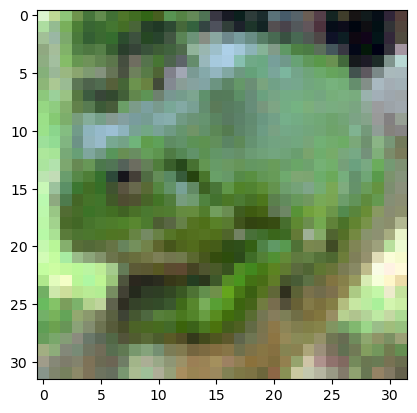

In [10]:
show_image(x_adv_IGSM)

# 5. Making an adversarial image using PGD

PGD is almost identical to IGSM, with the only difference being 'random' intialization rather than zero.

### Task 5
Implement PGD. A helper function has been included to help do this. The 'clip' function you made above is also necessary.

<details>
<summary>🔐 <b>Solution for Task #5</b></summary>

```python

def PGD_generator(path, y, epsilon=1/1000, alpha=0.0005, num_iters=6):
    """
    Return prediction tuple:
    
    Parameters:
    -----------
    model : PyTorch model used for classification
    loss_fn : Loss function
    path: Image filepath
    y: Image label
    epsilon: Perturbation variable
    Alpha: Perturbation variable
    num_iters: Number of iterations

    Returns:
    --------
    adv_img: Adversarially perturbed image tensor
    """
    
    model.eval()
    x = process_image(path)
    x = add_noise(x)
    x = torch.clamp(x, -1, 1)
    for i in range(num_iters):
        x.requires_grad = True
        output = model(x)
        loss = loss_fn(output, y)
        model.zero_grad()
        loss.backward()
        loss_gradient = x.grad.data
        x = x.detach()
        x = x + alpha * torch.sign(loss_gradient)
        x = clip(x, epsilon)
    return x
```

</details>

In [11]:
def add_noise(img, stdev=0.001, mean=0):
    """
    Helper function for PGD_generator
    
    Parameters:
    -----------
    img : Tensor
        image Tensor to be predicted

    Returns:
    --------
    noisy_img: Tensor
        Added noise to input
    """
    noise = torch.randn_like(img) * stdev + mean
    return img + noise

def PGD_generator(model, loss_fn, path, y, epsilon=8/255, alpha=0.01, num_iters=6):
    """
    Create adversarial image with PGD:
    
    Parameters:
    -----------
    model : PyTorch model used for classification
    loss_fn : Loss function
    path: Image filepath
    y: Image label
    epsilon: Perturbation variable
    Alpha: Perturbation variable
    num_iters: Number of iterations

    Returns:
    --------
    adv_img: Adversarially perturbed image tensor
    """

    img = process_image('frog.jpg')
    original_img = img.clone()
    img = add_noise(img)
    
    for i in range(num_iters):
        img.requires_grad = True
        
        # Calculate the loss (wrt. the pixels of the image)
        out = model(img)
        loss = loss_fn(out, y)
    
        # 2. Calculate the gradient with respect to input data
        loss.backward()
        grad = img.grad.data
    
        # 3. Perturb the image using the signs of the gradient
        img = img.detach()
        img += alpha * torch.sign(grad)
        img = clip(img, original_img, epsilon)  

    return img

    # return None

path = 'frog.jpg'
x_adv_PGD = PGD_generator(model, loss_fn, path, prediction(process_image(path))[0])
pred = prediction(x_adv_PGD)
print(f"Prediction: {classes[pred[0]]} with probability {pred[1][0]:.2f}")

Prediction: deer with probability 0.28


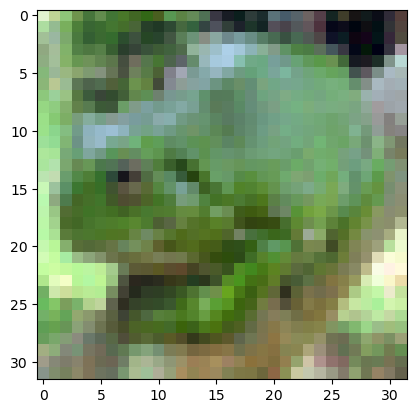

In [12]:
show_image(x_adv_PGD)

# 6. Evaluating the distance


Now, we will evaluate the distance between the original image and the adversarial images.

### Task 6
Implement the below formula:

$
\|v\|_p = \left( \sum_{i=1}^{n} |v_i|^p \right)^{\frac{1}{p}}.
$


Where v is the absolute difference between the input image and the adversarially perturbed image, complete the following function. This is equivalent to calculating the L_p norm.

Due to the addition of random noise, the distance for PGD will fluctuate above and below that of IGSM if they have the same parameters.

While numerical stability might render it impossible, the L_p norm should converge to the L_inf norm as p goes to infinity.

<details>
<summary>🔐 <b>Solution for Task #6</b></summary>

```python

def distance(x1, x2, p):
    """
    Return p norm of x1 and x2
    
    Parameters:
    -----------
    x1: Input tensor
    x2: Input tensor
    p: Norm integer
    
    Returns:
    --------
    distance: p norm of x1 and x2
    """
    x = (torch.abs(x1 - x2)) ** p
    x = torch.sum(x)
    return x ** (1/p)
```

</details>

In [13]:
def distance(x1, x2, p):
    """
    Return p norm of x1 and x2
    
    Parameters:
    -----------
    x1: Input tensor
    x2: Input tensor
    p: Norm integer
    
    Returns:
    --------
    distance: p norm of x1 and x2
    """
    ### TODO
    return torch.sum(torch.abs(x1 -x2)**p) ** (1/p)

Below we calculate the L2 norm for `x_adv_FGSM`, `x_adv_IGSM` and `x_adv_PGD`. You should see that the distance 

In [14]:
x = process_image('frog.jpg')
print(f"Distance for FGSM: {distance(x, x_adv_FGSM, 2):.2f}")
print(f"Distance for IGSM: {distance(x, x_adv_IGSM, 2):.2f}")
print(f"Distance for PGD: {distance(x, x_adv_PGD, 2):.2f}")

Distance for FGSM: 1.74
Distance for IGSM: 1.65
Distance for PGD: 1.65


In [15]:
print(torch.max(torch.abs(x_adv_FGSM - x)))
print(torch.max(torch.abs(x_adv_IGSM - x)))
print(torch.max(torch.abs(x_adv_PGD - x)))

tensor(0.0314)
tensor(0.0314)
tensor(0.0314)


In [16]:
8/255

0.03137254901960784

# 6a. Numerical Stability

Unfortunately, this approach lacks numerical stability as p goes to infinity. To mitigate this, the distance function can be tweaked slightly to allow for a more precise calculation. 

For example, the below example goes to 0 instead of the L_inf norm of 0.0069.

In [17]:
print(distance(x, x_adv_IGSM, 100))

tensor(0.)


Here is more numerically stable version of the function. It divides the difference tensor by its maximimum value before raising it to the power of p, before multiplying it back again, leading to greater robustness. Intuitively, this is because it makes every value lower than one, so there is no explosion with increasing powers.

In [18]:
def distance(x1, x2, p):
    """
    Return p norm of x1 and x2
    
    Parameters:
    -----------
    x1: Input tensor
    x2: Input tensor
    p: Norm integer
    
    Returns:
    --------
    distance: p norm of x1 and x2
    """
    z = torch.max(abs(x1 - x2))
    x = (torch.abs(x1 - x2) / z) ** p
    x = torch.sum(x)
    return z * x ** (1/p)

The below demonstration shows how the L_norm of x and PGD converges to L_inf as p goes to infinity.

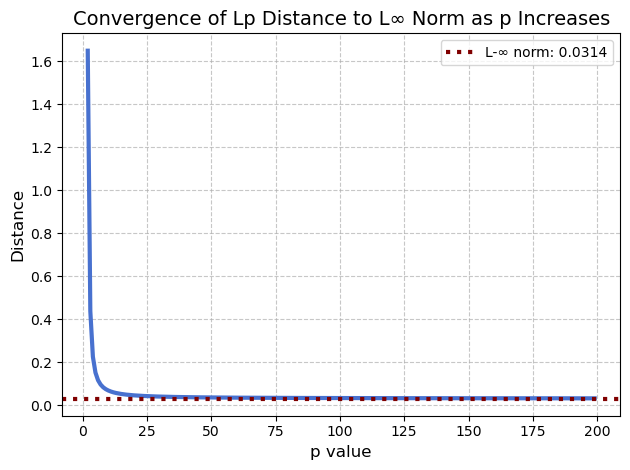

In [20]:
l_inf_norm = torch.max(torch.abs(x - x_adv_PGD)).item()
p_values = range(2,200)  
distances = [distance(x, x_adv_PGD, p).item() for p in p_values]

plt.plot(p_values, distances, '#4871cf', linewidth=3, markersize=6)
plt.axhline(y=l_inf_norm, color='maroon', linestyle='dotted', linewidth=3, label=f'L-∞ norm: {l_inf_norm:.4f}')
# plt.yscale('log')  # Log scale for y-axis
plt.xlabel('p value', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title('Convergence of Lp Distance to L∞ Norm as p Increases', fontsize=14)
plt.grid(True, ls="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()